In [73]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [48]:
df = pd.read_csv('data.csv')
df.head()

,age,job,marital,education,default,membership,cashe,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,buy.var.rate,cons.price.idx,cons.conf.idx,euribor3m,buy.nr,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [49]:
df.describe()

,age,duration,campaign,pdays,previous,buy.var.rate,cons.price.idx,cons.conf.idx,euribor3m,buy.nr
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [50]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'membership', 'cashe',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'buy.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'buy.nr', 'y'],
      dtype='object')

In [51]:
job_arr =np.unique(df['job'])
print ('job unique array =>')
print(job_arr)
print("count of /unknown/ : "+str(len(df.loc[df['job'] == 'unknown'])))

job unique array =>
['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
count of /unknown/ : 39


In [52]:
marital_arr =np.unique(df['marital'])
print ('marital unique array =>')
print(marital_arr)
print("count of /unknown/ : "+str(len(df.loc[df['marital'] == 'unknown'])))

marital unique array =>
['divorced' 'married' 'single' 'unknown']
count of /unknown/ : 11


In [53]:
education_arr =np.unique(df['education'])
print ('education unique array =>')
print(education_arr)
print("count of /unknown/ : "+str(len(df.loc[df['education'] == 'unknown'])))

education unique array =>
['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
count of /unknown/ : 167


In [54]:
default_arr =np.unique(df['default'])
print ('default unique array =>')
print(default_arr)

default unique array =>
['no' 'unknown' 'yes']


In [55]:
membership_arr =np.unique(df['membership'])
print ('membership unique array =>')
print(membership_arr)


membership unique array =>
['no' 'unknown' 'yes']


In [56]:
cashe_arr =np.unique(df['cashe'])
print ('cashe unique array =>')
print(cashe_arr)

cashe unique array =>
['no' 'unknown' 'yes']


In [57]:
contact_arr =np.unique(df['contact'])
print ('contact unique array =>')
print(contact_arr)

contact unique array =>
['cellular' 'telephone']


In [58]:
month_arr =np.unique(df['month'])
print ('month unique array =>')
print(month_arr)

month unique array =>
['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']


In [59]:
day_of_week_arr =np.unique(df['day_of_week'])
print ('day_of_week unique array =>')
print(day_of_week_arr)

day_of_week unique array =>
['fri' 'mon' 'thu' 'tue' 'wed']


In [60]:
poutcome_arr =np.unique(df['poutcome'])
print ('poutcome unique array =>')
print(poutcome_arr)

poutcome unique array =>
['failure' 'nonexistent' 'success']


In [61]:
y_arr =np.unique(df['y'])
print ('y unique array =>')
print(y_arr)

y unique array =>
['no' 'yes']


In [62]:
job = LabelEncoder()
df['job_n'] = job.fit_transform(df['job'].astype(str))
df = df.drop(['job'], axis='columns')

marital = LabelEncoder()
df['marital_n'] = marital.fit_transform(df['marital'].astype(str))
df = df.drop(['marital'], axis='columns')

education = LabelEncoder()
df['education_n'] = education.fit_transform(df['education'].astype(str))
df = df.drop(['education'], axis='columns')

default = LabelEncoder()
df['default_n'] = default.fit_transform(df['default'].astype(str))
df = df.drop(['default'], axis='columns')

membership = LabelEncoder()
df['membership_n'] = membership.fit_transform(df['membership'].astype(str))
df = df.drop(['membership'], axis='columns')

cashe = LabelEncoder()
df['cashe_n'] = cashe.fit_transform(df['cashe'].astype(str))
df = df.drop(['cashe'], axis='columns')

contact = LabelEncoder()
df['contact_n'] = contact.fit_transform(df['contact'].astype(str))
df = df.drop(['contact'], axis='columns')

month = LabelEncoder()
df['month_n'] = month.fit_transform(df['month'].astype(str))
df = df.drop(['month'], axis='columns')

day_of_week = LabelEncoder()
df['day_of_week_n'] = day_of_week.fit_transform(df['day_of_week'].astype(str))
df = df.drop(['day_of_week'], axis='columns')

poutcome = LabelEncoder()
df['poutcome_n'] = poutcome.fit_transform(df['poutcome'].astype(str))
df = df.drop(['poutcome'], axis='columns')

y = LabelEncoder()
df['y_n'] = y.fit_transform(df['y'].astype(str))
df = df.drop(['y'], axis='columns')

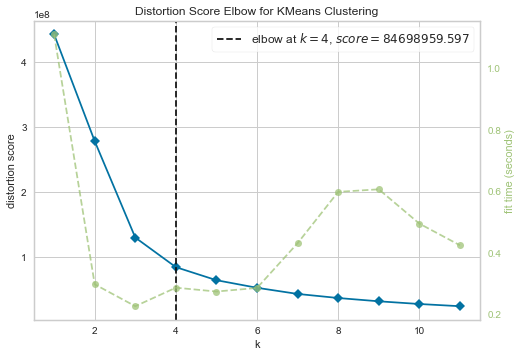

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(df)  
visualizer.show()

In [64]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df)
df['cluster'] = kmeans.labels_

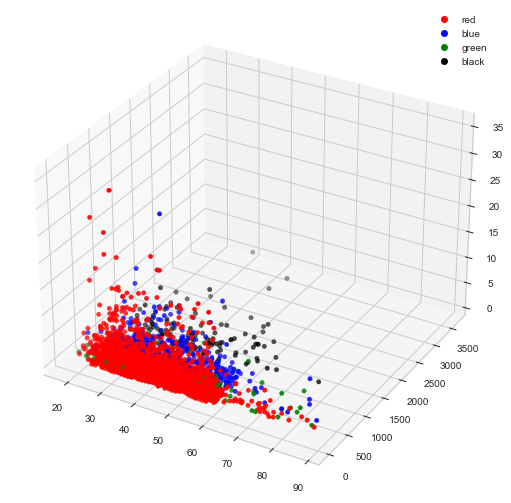

In [65]:
import matplotlib.pyplot as plt
fig_data = df
fig1=plt.figure(figsize=(18,9))
ax = plt.axes(projection='3d')
colors=['red','blue','green','black']
markers = [plt.Line2D([0,0],[0,0],
                      color=color, 
                      marker='o', 
                      linestyle='') for color in colors]
ax.scatter3D(fig_data['age'], 
             fig_data['duration'],
             fig_data['campaign'],
             c=fig_data['cluster'].apply(lambda x:colors[x]), 
             )
plt.legend(markers, colors, numpoints=1)
plt.show()

C:\Users\Ehsan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cluster', ylabel='age'>

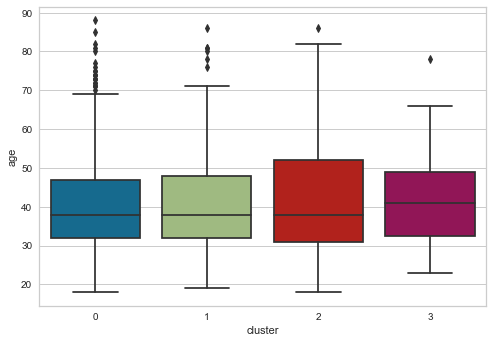

In [87]:
sns.boxplot(df['cluster'],df['age'])

C:\Users\Ehsan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cluster', ylabel='job_n'>

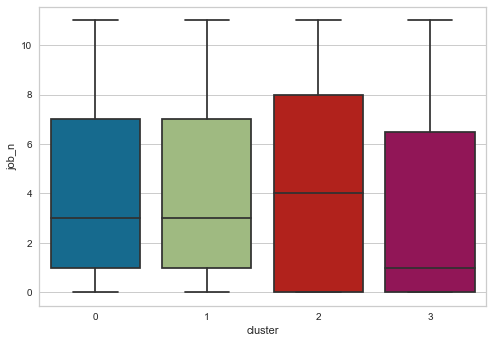

In [89]:
sns.boxplot(df['cluster'],df['job_n'])

C:\Users\Ehsan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cluster', ylabel='marital_n'>

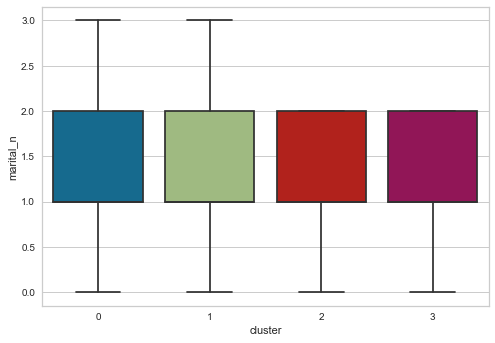

In [90]:
sns.boxplot(df['cluster'],df['marital_n'])

C:\Users\Ehsan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cluster', ylabel='education_n'>

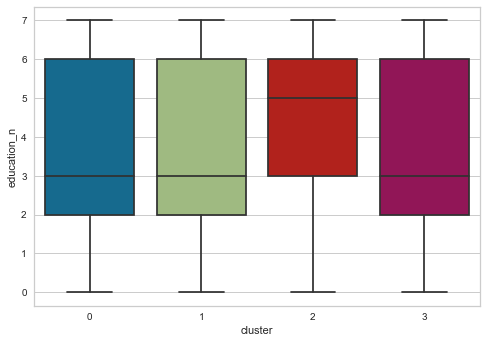

In [91]:
sns.boxplot(df['cluster'],df['education_n'])

C:\Users\Ehsan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cluster', ylabel='default_n'>

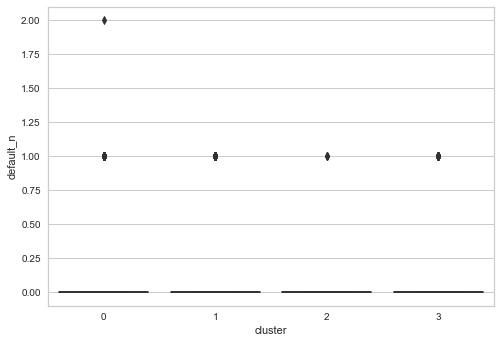

In [92]:
sns.boxplot(df['cluster'],df['default_n'])

C:\Users\Ehsan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cluster', ylabel='membership_n'>

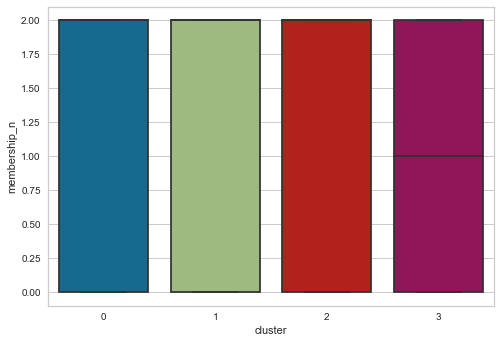

In [93]:
sns.boxplot(df['cluster'],df['membership_n'])

C:\Users\Ehsan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cluster', ylabel='cashe_n'>

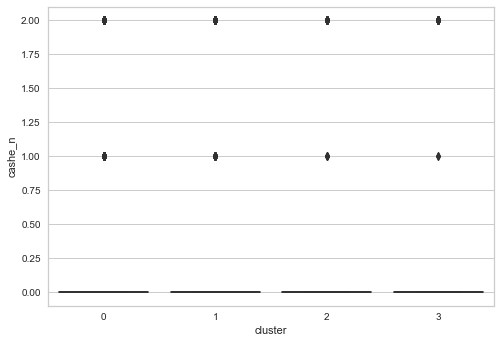

In [96]:
sns.boxplot(df['cluster'],df['cashe_n'])

C:\Users\Ehsan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cluster', ylabel='contact_n'>

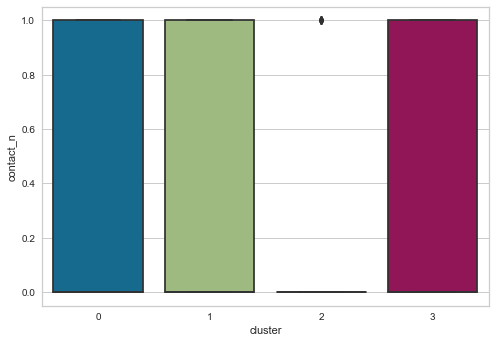

In [98]:
sns.boxplot(df['cluster'],df['contact_n'])

C:\Users\Ehsan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cluster', ylabel='month_n'>

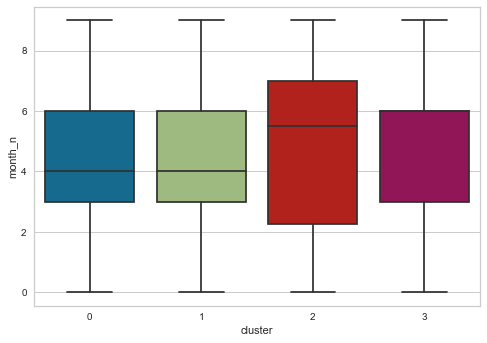

In [100]:
sns.boxplot(df['cluster'],df['month_n'])

C:\Users\Ehsan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cluster', ylabel='day_of_week_n'>

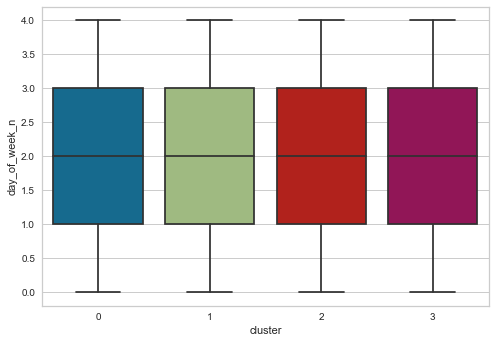

In [102]:
sns.boxplot(df['cluster'],df['day_of_week_n'])

C:\Users\Ehsan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cluster', ylabel='duration'>

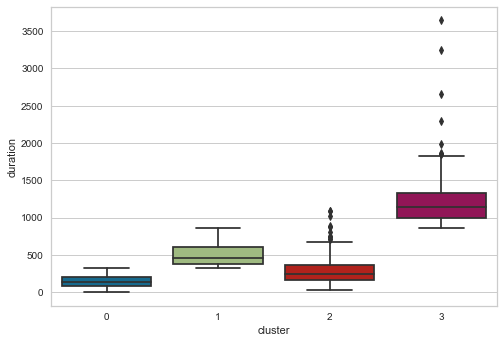

In [103]:
sns.boxplot(df['cluster'],df['duration'])

C:\Users\Ehsan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cluster', ylabel='campaign'>

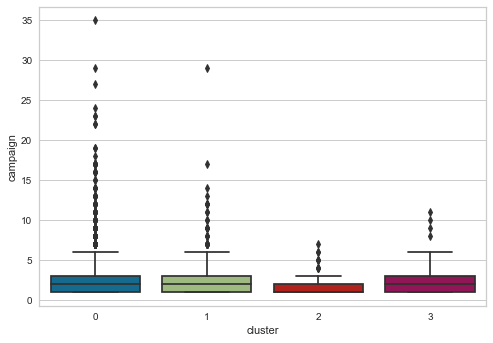

In [104]:
sns.boxplot(df['cluster'],df['campaign'])

C:\Users\Ehsan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cluster', ylabel='pdays'>

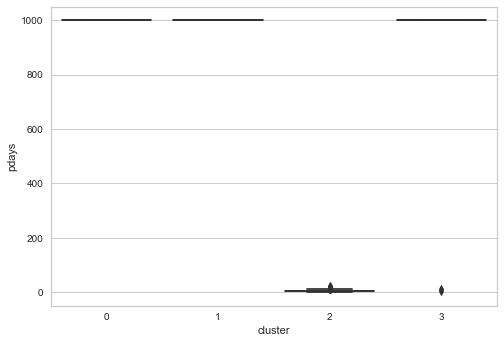

In [105]:
sns.boxplot(df['cluster'],df['pdays'])

C:\Users\Ehsan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cluster', ylabel='previous'>

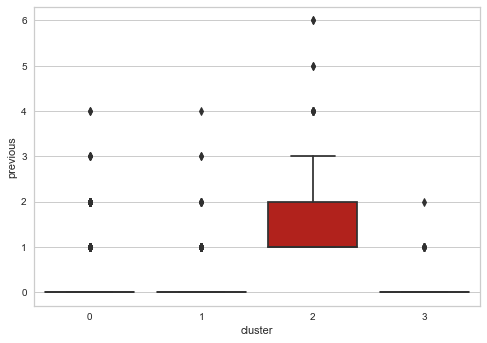

In [106]:
sns.boxplot(df['cluster'],df['previous'])

C:\Users\Ehsan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cluster', ylabel='poutcome_n'>

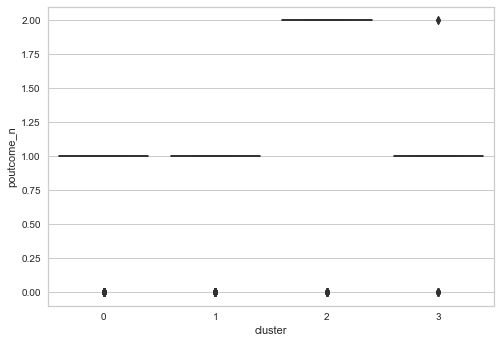

In [108]:
sns.boxplot(df['cluster'],df['poutcome_n'])

C:\Users\Ehsan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cluster', ylabel='buy.var.rate'>

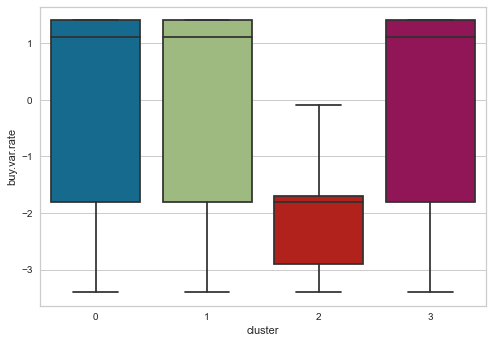

In [109]:
sns.boxplot(df['cluster'],df['buy.var.rate'])

C:\Users\Ehsan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cluster', ylabel='cons.price.idx'>

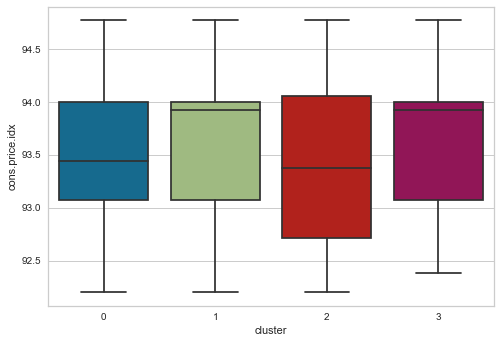

In [112]:
sns.boxplot(df['cluster'],df['cons.price.idx'])

C:\Users\Ehsan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cluster', ylabel='cons.conf.idx'>

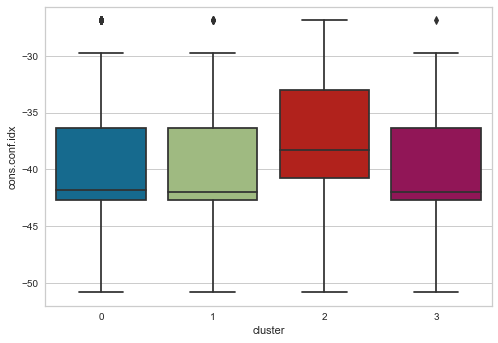

In [113]:
sns.boxplot(df['cluster'],df['cons.conf.idx'])

C:\Users\Ehsan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cluster', ylabel='euribor3m'>

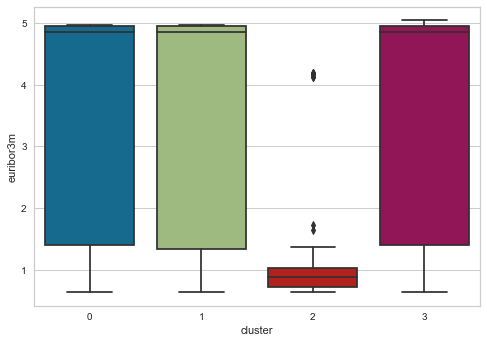

In [114]:
sns.boxplot(df['cluster'],df['euribor3m'])

C:\Users\Ehsan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cluster', ylabel='buy.nr'>

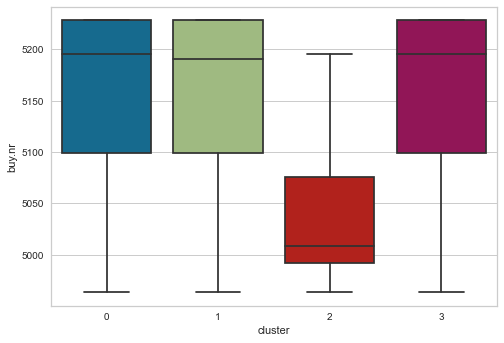

In [115]:
sns.boxplot(df['cluster'],df['buy.nr'])

C:\Users\Ehsan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cluster', ylabel='y_n'>

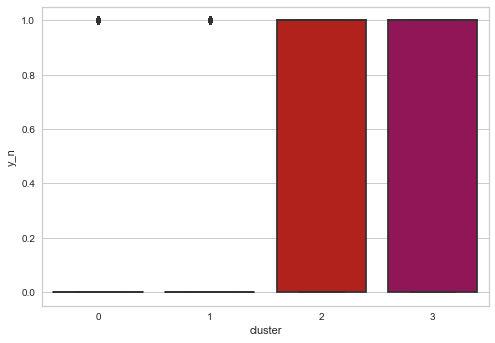

In [117]:
sns.boxplot(df['cluster'],df['y_n'])

<AxesSubplot:>

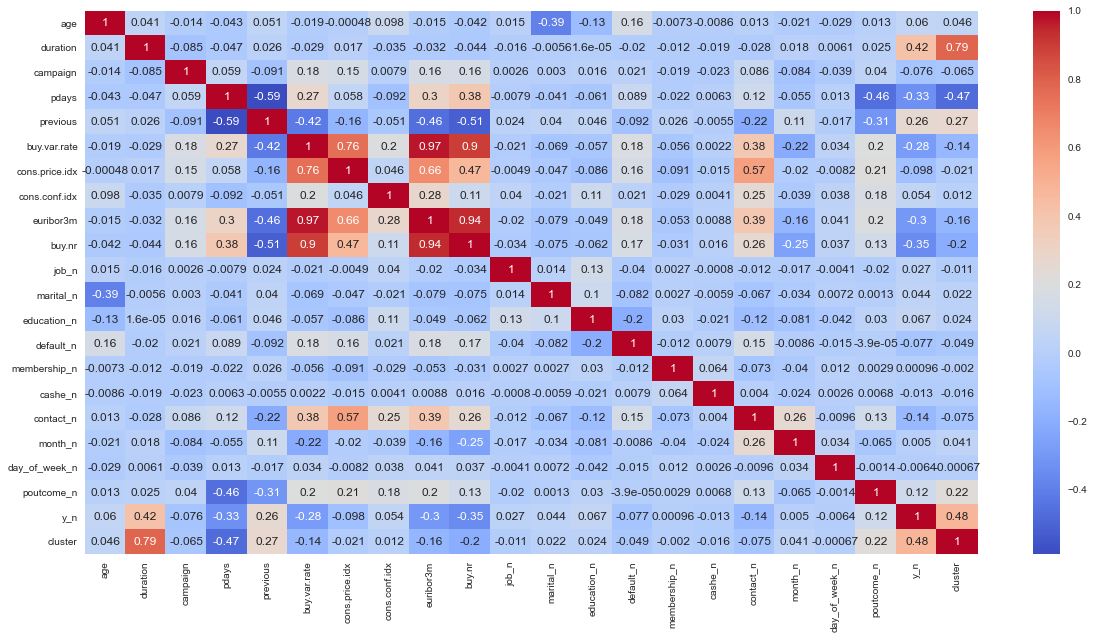

In [118]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [126]:
dfnew = df[['duration', 'pdays','y_n']]

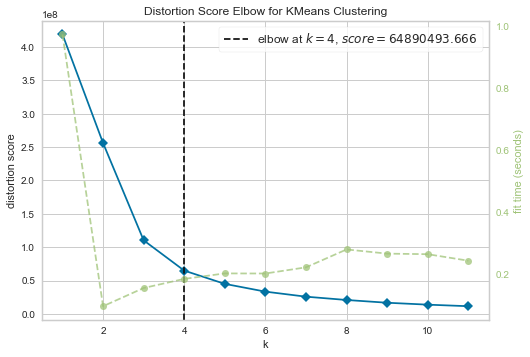

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [127]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(dfnew)  
visualizer.show()

In [128]:
kmeansnew = KMeans(n_clusters=4, random_state=0).fit(dfnew)
dfnew['cluster'] = kmeansnew.labels_

<ipython-input-128-7c99bf01d3ee>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



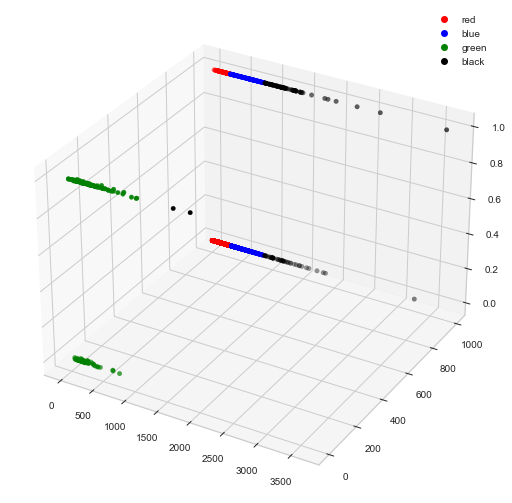

In [129]:
import matplotlib.pyplot as plt
fig_data = dfnew
fig1=plt.figure(figsize=(18,9))
ax = plt.axes(projection='3d')
colors=['red','blue','green','black']
markers = [plt.Line2D([0,0],[0,0],
                      color=color, 
                      marker='o', 
                      linestyle='') for color in colors]
ax.scatter3D(fig_data['duration'], 
             fig_data['pdays'],
             fig_data['y_n'],
             c=fig_data['cluster'].apply(lambda x:colors[x]), 
             )
plt.legend(markers, colors, numpoints=1)
plt.show()